# SVM

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
SVC()

In [ ]:
SVC()

In [ ]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')

# iris data

# train 

In [2]:
iris=sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:100,2:4],iris.iloc[:100,-1] ,test_size=0.3, shuffle=True) 

In [7]:
X_train.head()

,petal_length,petal_width
21,1.5,0.4
60,3.5,1.0
75,4.4,1.4
9,1.5,0.1
45,1.4,0.3


In [20]:
model=SVC(kernel='linear')

In [21]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
metrics.accuracy_score(y_test,model.predict(X_test))

1.0

In [18]:
vec=model.support_vectors_

In [12]:
vec

array([[1.9, 0.4],
       [3. , 1.1]])

# plot

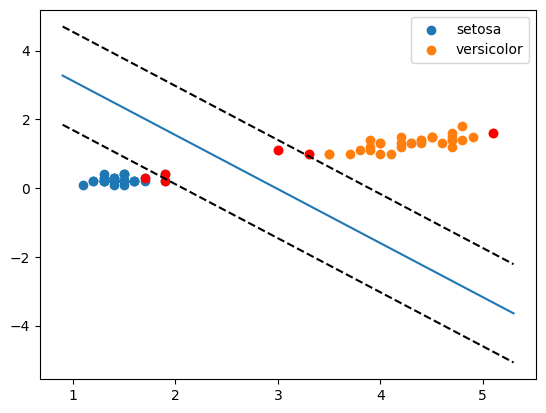

In [23]:
plt.scatter(X_train[y_train=="setosa"].iloc[:,0],X_train[y_train=="setosa"].iloc[:,1],label="setosa")
plt.scatter(X_train[y_train=="versicolor"].iloc[:,0],X_train[y_train=="versicolor"].iloc[:,1],label="versicolor")
plt.scatter(vec[:,0],vec[:,1],color="red")
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

In [ ]:
data=pd.read_csv("diabetes.csv")

In [ ]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1] ,test_size=0.3, shuffle=True)

In [ ]:
model.fit(X_train,y_train)
metrics.accuracy_score(y_test,model.predict(X_test))

0.7792207792207793

In [ ]:
vec=model.support_vectors_

In [ ]:
X_train.head(3)

,Pregnancies,Glucose
259,11,155
688,1,140
663,9,145


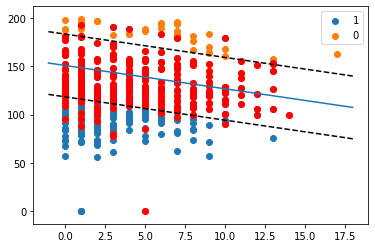

In [ ]:
plt.scatter(X_train[y_train==0].iloc[:,0],X_train[y_train==0].iloc[:,1],label="1")
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="0")
plt.scatter(vec[:,0],vec[:,1],color="red")
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

# soft margin using slack variables

![Screenshot%202019-12-03%20at%203.18.13%20PM.png](attachment:Screenshot%202019-12-03%20at%203.18.13%20PM.png)

![Screenshot%202019-12-03%20at%202.54.35%20PM.png](attachment:Screenshot%202019-12-03%20at%202.54.35%20PM.png)

# logisticdrawback.csv

In [ ]:
data=pd.read_csv("logisticdrawback.csv")

In [ ]:
data.shape

(300, 3)

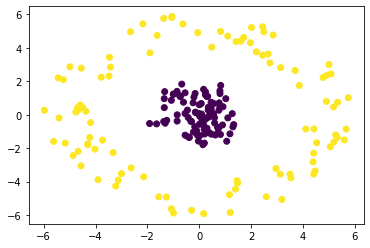

In [ ]:
plt.scatter(data.iloc[:200,0],data.iloc[:200,1],c=data.iloc[:200,-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:200,:-1],data.iloc[:200,-1] ,test_size=0.3, shuffle=True) 

In [ ]:
model=SVC(kernel='linear')

In [ ]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
metrics.accuracy_score(y_test,model.predict(X_test))

0.5666666666666667

In [ ]:
vec=model.support_vectors_

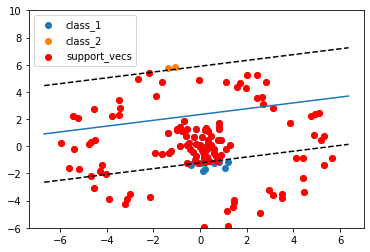

In [ ]:
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="red",label="support_vecs")
plt.ylim(-6,+10)
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.legend(loc="best")

# using rbf

In [ ]:
data=pd.read_csv("logisticdrawback.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:200,:-1],data.iloc[:200,-1] ,test_size=0.3, shuffle=True) 

In [ ]:
model=SVC(kernel='rbf',gamma=1)

In [ ]:
model.fit(X_train,y_train)

/Users/somnathmondal/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
metrics.accuracy_score(y_test,model.predict(X_test))

1.0

In [ ]:
vec=model.support_vectors_

In [ ]:
vec

array([[-1.33547361,  1.3762356 ],
       [-0.86005804,  1.3922934 ],
       [-0.38376178, -1.36023835],
       [-1.64818908, -0.54929524],
       [-1.37386474, -0.41051708],
       [ 0.23281199,  1.19498071],
       [ 0.8250868 ,  1.74770601],
       [ 1.05707212, -1.5849058 ],
       [ 0.19449442, -1.69509988],
       [ 1.26893289,  0.06322357],
       [-0.13135059,  0.11904256],
       [ 2.44369369,  5.25143347],
       [ 3.18713298, -5.05956332],
       [ 5.59180404, -1.50701936],
       [-3.22405571, -4.26484158],
       [-5.6161954 , -1.59506056],
       [-4.99021677,  2.86304167],
       [ 1.19229241, -5.84923076],
       [ 1.47252122, -4.0873588 ],
       [-5.9742012 ,  0.26459572],
       [ 2.84807405,  4.75503348],
       [ 4.1048444 , -0.8556285 ],
       [-4.86699521, -2.43997032],
       [ 3.5347451 , -3.77661188],
       [ 0.47971279,  4.03078897],
       [ 0.81754689,  4.97376731],
       [ 5.32969367,  0.73904671],
       [-0.99638172, -5.87367329],
       [-2.14257718,

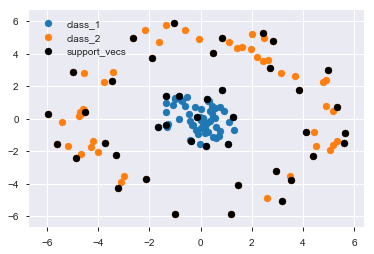

In [ ]:
vec=model.support_vectors_
plt.scatter(X_train[y_train==1].iloc[:,0],X_train[y_train==1].iloc[:,1],label="class_1")
plt.scatter(X_train[y_train==2].iloc[:,0],X_train[y_train==2].iloc[:,1],label="class_2")
plt.scatter(vec[:,0],vec[:,1],color="black",label="support_vecs")
plt.legend(loc="best")

In [ ]:
#'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 